# Project tsp

Please fill in the names of the team mebers.

<div class="alert alert-block alert-danger">

<b>Team: XX</b>
- Mirac Sancak 781232
- Lionel Toussoumsnaba
- XX

<b>Result:</b>
    
| Task   |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |  11 |  12 |  Sum  |
|--------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|--------
| Points | ?/1 | ?/2 | ?/1 | ?/1 | ?/1 | ?/2 | ?/2 | ?/2 | ?/2 | ?/2 | ?/2 | ?/2 | ??/20 |  

    
</div>

## Packages

<div class="alert alert-block alert-danger">
    
<b>Important: Do not import other packages or libraries!</b>
    
</div>

### Python

In [99]:
from platform import python_version
print('python version = '+ python_version())

python version = 3.9.6


### Display images and videos

In [100]:
from IPython.display import HTML, Image, IFrame, YouTubeVideo

### NumPy

In [101]:
import numpy as np
print('numpy version = '+ np.__version__)

numpy version = 2.0.2


### Matplotlib

In [102]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
print('matplotlib version = '+ matplotlib.__version__)

matplotlib version = 3.9.4


### Permutations

In [103]:
from itertools import permutations

### Time

In [104]:
import time

### Random

In [105]:
import random

### Google Colab
If you are using Google Colab mount drive and change directory.

In [106]:
if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/Colab Notebooks/Modelling and Simulation/tsp'
else:
    print('Not running on Google Colab')

Not running on Google Colab


## 1 Modelling
The traveling salesman problem (TSP) consists of determining an optimal route for a round trip through several cities.
At first glance, it does not seem very difficult to find a solution to that problem.
There is only a finite number of different round trips that we can try out one after the other.
So we can identify the optimal route by comparing all possible routes.
However, the number of all possible routes is already very high for a small number of cities.
Not even the most powerful supercomputers are capable of trying all possible round trips.

Various practical problems can be traced back to the problem of the traveling salesman.
For example, the optimal control of a drilling tool when creating printed circuit boards.
In this example, the cities correspond to the holes to be drilled in the board.
The term city is therefore not to be taken literally.

A journey can be optimal under different aspects, shortest way, fastest connection, lowest cost, etc.
For all these aspects we use the term distance.
This term should not be taken literally either.
For example, the distance between two cities for a low-cost trip corresponds to the cost for traveling from one city to the other.

We call the sum of all distances the length of the route.
We look for the global minimum length among all possible routes.

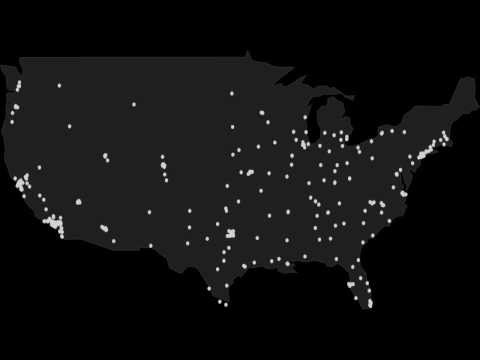

In [107]:
YouTubeVideo('SC5CX8drAtU')

## 2 Numerical treatment
Mathematically speaking, we have to solve an optimization problem.
More precisely, a discrete optimization problem, since there is only a finite number of different round trips.

### 2.1 Route, distance matrix and length
We assign a unique index between $0$ and $n-1$ to each city.
Here $n$ denotes the number of cities.
A route is represented by any permutation of the numbers from $0$ to $n-1$.

<div class="alert alert-block alert-warning">
    
<b>Example</b>

The route through $5$ cities, which starts in the city with index $2$, then leads through the cities with the indices $4$, $0$, $1$ and $3$ back to the city with index $2$, is represented by the permutation:

$$
P_2 \longrightarrow
P_4 \longrightarrow
P_0 \longrightarrow
P_1 \longrightarrow
P_3 \longrightarrow
P_2 \mbox{ : }
\quad \quad \quad
[ \, 2 \quad 4 \quad 0 \quad 1 \quad 3 \, ].
$$
</div>

Since the first and the last city are equal, we do not use the index of the first city twice.
The TSP now consists of finding a permutation, so that the length of the route is as short as possible.

A TSP can be described by a distance matrix.
The distance between the city with index $i$ and the city with index $j$ is stored in the $i$-th row and $j$-th column of the distance matrix $\mbox{dist}$:

$$
	\mbox{dist}_{i,j} = \mbox{distance betwenn city with index $i$ and city with index $j$}, \quad i,j = 0,1,2, \ldots, n-1.
$$

All elements on the diagonal of the matrix are zero. 
For many problems the distance matrix is symmetrical, but there are also problems where the distance matrix is not symmetrical.
For example, the costs for the outward and return journey between two cities may be different.

<div class="alert alert-block alert-warning">
    
<b>Example (10 cities in Germany)</b>

Let's consider a practical example with 10 cities in Germany.
The positions are specified by longitude and latitude.
     
$$
\begin{array}{l|c|c|c|c|c|c|c|c|c}
 & \mbox{Berlin}
 & \mbox{Esslingen} 
 & \mbox{Frankfurt}
 & \mbox{Goettingen}
 & \mbox{Hamburg} 
 & \mbox{Kiel}
 & \mbox{Koeln}
 & \mbox{Leipzig}
 & \mbox{Muenchen}
 & \mbox{Nuernberg} \\
\hline
\mbox{longitude} & 13.4114 & 9.3071 & 8.6636 & 9.9352 & 9.9921 & 10.1371 & 6.9599 & 12.3712 & 11.5753 & 11.0772 \\
\hline
\mbox{latitude} & 52.52340 & 48.74275 & 50.13083 & 51.53276 & 53.55340 & 54.32167 & 50.93836 & 51.33962 & 48.13710 & 49.45387 \\  
\end{array}
$$

The distances between the cities can be determined using the distance calculation tool on https://www.luftlinie.org/.
The specifications are in km and correspond to the direct distances as the crow flies.

$$
\begin{array}{l|ccccccccc}
 & \mbox{Berlin}
 & \mbox{Esslingen} 
 & \mbox{Frankfurt}
 & \mbox{Goettingen}
 & \mbox{Hamburg} 
 & \mbox{Kiel}
 & \mbox{Koeln}
 & \mbox{Leipzig}
 & \mbox{Muenchen}
 & \mbox{Nuernberg} \\
\hline
\mbox{Berlin}     &   0 & 510 & 424 & 262 & 256 & 295 & 478 & 150 & 505 & 378\\  
\mbox{Esslingen}  & 510 &   0 & 161 & 313 & 537 & 623 & 296 & 362 & 180 & 151\\ 
\mbox{Frankfurt}  & 424 & 161 &   0 & 180 & 391 & 477 & 150 & 293 & 307 & 189\\
\mbox{Goettingen} & 262 & 313 & 180 &   0 & 225 & 310 & 217 & 170 & 395 & 245\\
\mbox{Hamburg}    & 256 & 537 & 391 & 225 &   0 &  86 & 356 & 294 & 612 & 462\\ 
\mbox{Kiel}       & 295 & 623 & 477 & 310 &  86 &   0 & 433 & 364 & 695 & 545\\
\mbox{Koeln}      & 478 & 296 & 150 & 217 & 356 & 433 &   0 & 380 & 456 & 336\\
\mbox{Leipzig}    & 150 & 362 & 293 & 170 & 294 & 364 & 380 &   0 & 361 & 229\\
\mbox{Muenchen}   & 505 & 180 & 307 & 395 & 612 & 695 & 456 & 361 &   0 & 151\\
\mbox{Nuernberg}  & 378 & 151 & 189 & 245 & 462 & 545 & 336 & 229 & 151 &   0\\              
\end{array}
\label{distancematrix}\tag{1}
$$

</div>

<div class="alert alert-block alert-info">
    
### Task 1: Length <font color=red>(1 point)</font>
Calculate the length of the route that visits all cities in the distance matrix [(1)](#mjx-eqn-distancematrix) in alphabetical order.
</div>

<div class="alert alert-block alert-success">

<b>Solution of Task 1</b>

<b>ToDo: put your text here!</b>

<b>Berlin -> Esslingen = 510 </b>

<b>Esslingen -> Frankfurt = 161 </b>

<b>Frankfurt -> Goettingen = 180 </b>

<b>Goettingen -> Hamburg = 225 </b>

<b>Hamburg -> Kiel = 86 </b>

<b>Kiel -> Koeln = 433 </b>

<b>Koel -> Leipzig = 380 </b>

<b>Leipzig -> Muenchen = 361 </b>

<b>Muenchen -> Nuernberg = 151 </b>

<b>Nuernebrg -> Berlin = 387 </b>

<b>510 + 161 + 180 + 225 + 86 + 433 + 380 + 361 + 151 + 387 = 2865</b>





<div>

### 2.2 Brute-Force-Algorithm
An obvious approach is to solve the problem of the travelling salesman by trying out all possibilities.
To do so, one sets any city as a starting point and considers all possible routes through all cities that start and end in this city.
For each route we calculate the length and choose the shortest route.
This strategy is called the brute force method.
We will see that with the performance of current computers, this method is only suitable for problems with a small number of cities.

<div class="alert alert-block alert-danger">

The performance of a computer is measured by floating point operations per second (FLOPS, flops or flop/s).
You will find more information on [https://en.wikipedia.org/wiki/FLOPS](https://en.wikipedia.org/wiki/FLOPS) and [https://en.wikipedia.org/wiki/TOP500](https://en.wikipedia.org/wiki/TOP500).
    
</div>

<div class="alert alert-block alert-info">
    
### Task 2: Brute-Force-Algorithm <font color=red>(2 points)</font>
Derive a formula for the number of elementary arithmetic operations ($+$, $-$, $*$, $/$, $>$, $<$, $\ldots$) required to solve the problem of the traveling salesman with $n$ cities using the brute force algorithm.
    
Suppose we implement the brute force algorithm optimally.
How long would it take on your computer to calculate an optimal route through $n=10$ cities using the brute force algorithm?
How long would it take to calculate an optimal route through $n=30$ cities using the brute force algorithm with the fastest computer available?
</div>

<div class="alert alert-block alert-success">

<b>Solution of Task 2</b>

<b>ToDo: put your text here!</b>

<b>Normal: (n-1)!</b>

<b>Mathematisch n! = n * (n-1)!</b>

<b>n = 10! ~ 3.628.800</b>

<b>n = 30! ~ 2.65 * 10^32</b>

<b>Beispielsberechnungg für die Geschwindigkeit ist ein Macbook Pro mit einem basis M4 Pro 12 Kernen mit ca. 20-45 GFLOPS</b>

<b>mit 10! ungefähr unter 1 Sekunde</b>

<b>mit 30! fast unmöglich, da zu hohe Zahl, sogar ein Supercomputer mit 1,7 ExaFLOPS 30 * 29!/2 ~ 1,,3*10^13s ~ 760 000 Jahre</b>

<b>PyCharm:

    def factorial_iter(n):

        f = 1

        for k in range(2, n+1):

            f *= k

        return f
</b>


</div>

### 2.3 Greedy-Algorithm
In the so-called greedy algorithm, you specify an arbitrary city as the starting point and then select the city with the shortest distance to the first city as the second city.
Of all remaining cities, the third city is chosen as the one that has the shortest distance to the second city.
This procedure is continued until all cities have been visited.

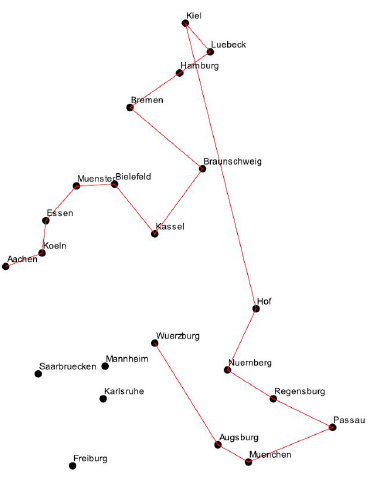

In [108]:
Image('tsp_greedy_figure.png', width=300, height=360)

<div class="alert alert-block alert-warning">

<b>Example</b>
    
In the figure above Aachen was chosen as the starting point of the route.
The city closest to Aachen is Koeln, then the route leads to Essen.
You can see that the route from Hamburg via Luebeck and Kiel to Hof is not optimal.
This route contains edges that intersect.
The route from first Hamburg to Kiel, and then via Lübeck to Hof, is shorter.
More intersecting edges are found when you complete the route from Wuerzburg to Aachen.
</div>

This method is called greedy, because it greedily rushes to the nearest city.
The greedy algorithm tries to find the shortest route by determining step by step the shortest route to the next city.

In mathematical terms, this means finding a global minimum by gradually determining the local minimum.
However, as the example shows, the greedy algorithm usually does not provide the optimal solution to the problem.

<div class="alert alert-block alert-info">
    
### Task 3: Greedy-Algorithm <font color=red>(1 point)</font>
Determine a route by hand starting in Esslingen with the Greedy-Algorithm for the distance matrix ([1](#mjx-eqn-distancematrix)).
How long is this route?
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 3</b>
    
<b>ToDo: put your text here!</b>

Esslingen nach Nuernebrg = 151

Nuernber nach Muenchen = 151

Muenchen  nach Frankfurt = 307

Frankfurt nach Koeln = 150

Koeln nach Goettingen = 217

Goettingen nach Leipzig = 170

Leipzig nach Berlin = 150

Berlin nach Hamburg = 256

Hamburg nach Kiel = 86

Kiel nach Esslingen = 623

151 + 151 + 307 + 150 + 217 + 170 + 150 + 256 + 86 + 623 = **2261 km**
    
    
    


    
    
    
    
    
    
    
    
    
    
    
    




    
</div>

### 2.4 2-Opt-Algorithm
The 2-opt-algorithm is a special case of a continuous improvement strategy.

<b>Continuous improvement</b>

Continuous improvement means that we start with an arbitrary route and try to modify this route in order to find a shorter route.
Then we modify this shorter route in a similar way in order to find an even shorter route.
We continue this process until no shorter route is found.
Thus we generate a sequence of routes whose length decreases in a strictly monotonous manner.

<b>Edge swap</b>

As we have already seen, routes with intersecting edges are not optimal.
This observation forms the basis for the so-called 2-Opt-Algorithm.
The term 2-Opt is an abbreviation for the optimal exchange of two edges.
To be more precisely, a pair of edges is replaced by another pair of edges.

We would like to address a frequently occurring misunderstanding here.
The 2-opt-algorithm does not explicitly search for edges that intersect.
The number of intersecting edges is indirectly reduced by the 2-Opt-Algorithm.
The reduction is caused by the fact that routes with less intersection edges are usually shorter. 

Suppose we have a route where the points are run through in the natural order:

$$
P_0 \longrightarrow
P_1 \longrightarrow
\ldots \longrightarrow
P_{i-1} \longrightarrow
P_i \longrightarrow
\ldots \longrightarrow
P_j \longrightarrow
P_{j+1} \longrightarrow
\ldots \longrightarrow
P_{n-2} \longrightarrow
P_{n-1} \longrightarrow
P_{0}
$$

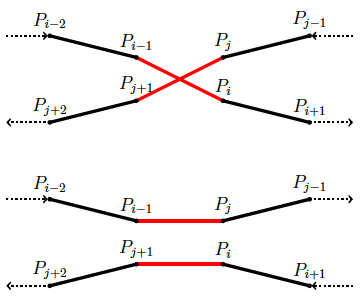

In [109]:
Image('tsp_swap_figure.png', width=300, height=360)

The figure above illustrates the exchange of the two edges
$\overline{P_{i-1}P_{i}}$
and
$\overline{P_{j}P_{j+1}}$
for the two edges
$\overline{P_{i-1}P_{j}}$
and
$\overline{P_{i}P_{j+1}}$.

For the indexing of the route, this means that the sequence: 

$$
[ \, 0 \quad 1 \quad \ldots \quad i-1 \quad 
\color{red}{\mathbf{i \quad i+1 \quad \ldots \quad j-1 \quad j}}
\quad j+1 \quad \ldots \quad n-1 \, ]
$$

will be transferred to the new sequence:

$$
[ \, 0 \quad 1 \quad \ldots \quad i-1 \quad
\color{red}{\mathbf{j \quad j-1 \quad \ldots \quad i+1 \quad i}}
\quad j+1 \quad \ldots \quad n-1 \, ] \, .
$$

The indices from $i$ to $j$ are runing backwards in the new sequence.
All other indices remain unchanged.
Of course, the whole thing  only works if the index $j$ is larger than the index $i$.

With the 2-Opt-algorithm we start with an arbitrary route and try to improve this route by swapping two edges.
Then we try to improve this shorter route again by swapping two edges.
This principle will be repeated until no improvement can be achieved by an edge swap.
As soon as swapping two edges does no longer bring an advantage, the procedure is aborted.

A distinction is made between two different strategies: first improvement and steepest descent.

<b>First improvement</b>

First improvement works as follows.
Suppose we have a route, where the points are run through in their natural order:

$$
P_0 \longrightarrow
P_1 \longrightarrow
\ldots \longrightarrow
P_{i-1} \longrightarrow
P_i \longrightarrow
\ldots \longrightarrow
P_j \longrightarrow
P_{j+1} \longrightarrow
\ldots \longrightarrow
P_{n-2} \longrightarrow
P_{n-1} \longrightarrow
P_{0}
$$

Then we consider a new route where the edges
$\overline{P_{n-1}P_{0}}$
and
$\overline{P_{1}P_{2}}$
are swapped.
In terms of indices, this means swap index $i=0$ with index $j=1$: 

$$
[ \, \color{red}{\mathbf{0 \quad 1}} \quad \ldots \quad n-2 \quad n-1 \, ]
\quad \longrightarrow \quad
[ \, \color{red}{\mathbf{1 \quad 0}} \quad \ldots \quad n-2 \quad n-1 \, ]
$$

If the new route with the swapped edges is shorter, then we choose this improved route and we start again with continous improvement.

If the new route with the swapped edges is not shorter, then we consider a new route where the edges
$\overline{P_{n-1}P_{0}}$
and
$\overline{P_{2}P_{3}}$
are swapped.
In terms of indices this means a swap with index $i=0$ and with index $j=2$: 

$$
[ \, \color{red}{\mathbf{0 \quad 1 \quad 2}} \quad \ldots \quad n-2 \quad n-1 \, ]
\quad \longrightarrow \quad
[ \, \color{red}{\mathbf{2 \quad 1 \quad 0}} \quad \ldots \quad n-2 \quad n-1 \, ]
$$

We continue in this way, until we have tried all pair combinations of edges. 
The last possibility is to consider a new route where the edges
$\overline{P_{n-3}P_{n-2}}$
and
$\overline{P_{n-1}P_{0}}$
are swapped.
In terms of indices this means a swap with index $i=n-2$ and with index $j=n-1$: 

$$
[ \, 0 \quad 1 \quad \ldots \quad \color{red}{\mathbf{n-2 \quad n-1}} \, ]
\quad \longrightarrow \quad
[ \, 0 \quad 1 \quad \ldots \quad \color{red}{\mathbf{n-1 \quad n-2}} \, ]
$$

If the last swap does not result in a shorter route either, then no improvement can be achieved in this way and we stop the procedure.

<b>Steepest descent</b>

The first improvement strategy accepts the first edge swap that results in a shorter route.
In contrast, the steepest descent strategie considers all possible edge swaps and selects the shortest route from all possibilities.
This means that the effort for each route is higher, but the improvement may be greater.

<div class="alert alert-block alert-info">
    
### Task 4: Steepest descent <font color=red>(1 point)</font>
How many edge swaps are to be considered per route for a TSP with $n$ cities using steepest descent?
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 4</b>
    
<b>ToDo: put your text here!</b>

Bei 2-Opt (steepest descent) wählt man zwei nicht-benachbarte Kanten eines Rundwegs.
Es gibt \binom{n}{2} Kantenpaare insgesamt, aber n Paare sind benachbart (teilen einen Knoten: i mit i\!+\!1 sowie 0 mit n\!-\!1).

$$
\text{Swaps}=\binom{n}{2}-n=\frac{n(n-3)}{2}
$$

$$
[\,0\;1\;\ldots\;i-1\;
\color{red}{\mathbf{i\;i+1\;\ldots\;j-1\;j}}\;
j+1\;\ldots\;n-1\,]
$$









</div>

### 2.5 Simulated annealing
With the principle of continuous improvement, it can happen that the process gets stuck in a local minimum.
In the illustration below, the blue dot belongs to the arbitrarily chosen starting route.
The red dots mark local minima.
In order to reach the global minimum in the green dot, longer routes must be accepted in the meantime.

In [110]:
IFrame('https://c.mql5.com/2/30/pic1__1.png?raw=1', width=300, height=300)

Source: https://www.mql5.com/en/articles/4150

Simulated Annealing is a method that is able to overcome local minima.
This method is based on the cooling process of glowing metal.
Starting from an arbitrary route, an alternative route is determined at random.
Following the 2-Opt-Algorithm, an alternative route is determined by performing an edge swap on the previous route. 
The edges that are swapped are determined randomly.
The length of the previous route is then compared with the length of the alternative route.
If the alternative route is shorter, the next step is to perform a random edge swap based on the alternative route.
In contrast to continuous improvement, Simulated Annealing also accepts longer alternative routes.
The acceptance of longer routes is based on a random principle, whereby the probability depends on various parameters.

The most important parameter is the temperature $T$ of the cooling process.
This parameter starts with the value $T_{\mbox{high}}$ and decreases by a cooling rate $\beta \in (0,1)$:

$$
	T_{\mbox{high}} \to T_{\mbox{high}} \cdot \beta \to T_{\mbox{high}} \cdot \beta^2 \to T_{\mbox{high}} \cdot \beta^3 \to \ldots \to T_{\mbox{low}}.  
$$

Since the cooling rate $\beta$ has a value in the range between $0$ and $1$, the temperature decreases step by step.
The process is terminated as soon as the temperature falls below a final temperature $T_{\mbox{low}}$.

The probability of accepting a longer alternative route depends on various factors.
With decreasing temperature $T$ the probability of accepting a longer alternative route decreases.
If the length $l_1$ of the alternative route is significantly longer than the length $l_0$ of the original route, then the probability for the acceptance of a longer alternative route is low.
Both aspects can be realized by a formula for the probability $p$ of acceptance of the alternative route:

$$
	p = 
	\left\{
		\begin{array}{cl}
			\mathrm{e}^{-\frac{l_1 - l_0}{T}} & \mbox{for } l_1 \geq l_0,\\[1ex]
				1                               & \mbox{for } l_1 < l_0.
		\end{array}
	\right.
$$

An alternative route with a shorter length than the original route has the acceptance probability $p=1$.
This means that shorter alternative routes are always accepted regardless of the temperature $T$. 

The decision whether to replace the original route with the alternative route is made using a pseudo-random number $z$.
Pseudo-random number means that the number $z$ is calculated by an algorithm that provides equally distributed values in the interval $[0,1]$.

If the condition

$$
z \leq p
$$

is fulfilled, the procedure is continued with the alternative route.
Otherwise, the procedure is continued with the original route.

<div class="alert alert-block alert-info">
    
### Task 5: Simulated annealing <font color=red>(1 point)</font>
Derive a formula for the total number $n$ of temperature steps depending on $T_{\mbox{high}}$, $T_{\mbox{low}}$ and $\beta$.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 5</b>
    
<b>ToDo: put your text here!</b>

$$
n=\left\lceil \frac{\ln\!\left(\tfrac{T_{\mathrm{low}}}{T_{\mathrm{high}}}\right)}{\ln(\beta)} \right\rceil
\quad\text{bzw.}\quad
n=\left\lceil \frac{\ln\!\left(\tfrac{T_{\mathrm{high}}}{T_{\mathrm{low}}}\right)}{\ln\!\left(\tfrac{1}{\beta}\right)} \right\rceil
$$












</div>

## 3 Implementation
Our goal is to implement the different algorithms and test them.
### 3.1 Route, distance matrix and length
The distance matrix [(1)](#mjx-eqn-distancematrix) is implemented in Python with data type `numpy.uint16`.
In addition the names, longitudes and latitudes of the cities are stored.

In [111]:
def tspExample(n=10):

    dist = np.array([
        [   0 , 510 , 424 , 262 , 256 , 295 , 478 , 150 , 505 , 378] ,
        [ 510 ,   0 , 161 , 313 , 537 , 623 , 296 , 362 , 180 , 151] ,
        [ 424 , 161 ,   0 , 180 , 391 , 477 , 150 , 293 , 307 , 189] ,
        [ 262 , 313 , 180 ,   0 , 225 , 310 , 217 , 170 , 395 , 245] ,
        [ 256 , 537 , 391 , 225 ,   0 ,  86 , 356 , 294 , 612 , 462] ,
        [ 295 , 623 , 477 , 310 ,  86 ,   0 , 433 , 364 , 695 , 545] ,
        [ 478 , 296 , 150 , 217 , 356 , 433 ,   0 , 380 , 456 , 336] ,
        [ 150 , 362 , 293 , 170 , 294 , 364 , 380 ,   0 , 361 , 229] ,
        [ 505 , 180 , 307 , 395 , 612 , 695 , 456 , 361 ,   0 , 151] ,
        [ 378 , 151 , 189 , 245 , 462 , 545 , 336 , 229 , 151 ,   0] ,
    ],dtype=np.uint16)

    name = ['Berlin','Esslingen','Frankfurt','Goettingen','Hamburg','Kiel','Koeln','Leipzig','Muenchen',
'Nuernberg']

    pos = np.array([
        [13.4114,52.52340],
        [ 9.3071,48.74275],
        [ 8.6636,50.13083],
        [ 9.9352,51.53276],
        [ 9.9921,53.55340],  
        [10.1371,54.32167],
        [ 6.9599,50.93836], 
        [12.3712,51.33962], 
        [11.5753,48.13710],
        [11.0772,49.45387] 
    ])
    
    return dist[0:n,0:n], name[0:n], pos[0:n]


In [112]:
dist, name, pos = tspExample(5)
print(dist)
print(name)
print(pos)

[[  0 510 424 262 256]
 [510   0 161 313 537]
 [424 161   0 180 391]
 [262 313 180   0 225]
 [256 537 391 225   0]]
['Berlin', 'Esslingen', 'Frankfurt', 'Goettingen', 'Hamburg']
[[13.4114  52.5234 ]
 [ 9.3071  48.74275]
 [ 8.6636  50.13083]
 [ 9.9352  51.53276]
 [ 9.9921  53.5534 ]]


With the function `tspNames()` the names of a route can be generated.

In [113]:
def tspNames(name,route):
    names = list()
    for k in route:
        names.append(name[k])
    return names

In [114]:
route = np.array([1,3,0,2,4])
print(route)
print(tspNames(name,route))

[1 3 0 2 4]
['Esslingen', 'Goettingen', 'Berlin', 'Frankfurt', 'Hamburg']


<div class="alert alert-block alert-info">
    
### Task 6: Length <font color=red>(2 points)</font>
Implement the function `tspLength()` that calculates the length of a route with respect to the distance matrix.
Test the function with the route that visits all cities in the distance matrix [(1)](#mjx-eqn-distancematrix) in alphabetical order and compare the result with task 1.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 6</b>

Implementation of the function `tspLength()`: 
<div>

In [115]:
def tspLength(dist, route):
    # Startwert für die gesamte Streckenlänge
    length = 0

    # Gehe alle Städte der Reihe nach durch
    for i in range(len(route) - 1):
        start = route[i]
        ziel = route[i + 1]
        length += dist[start, ziel]   # Entfernung addieren

    # Am Ende wieder zurück zur Startstadt
    length += dist[route[-1], route[0]]

    return int(length)

<div class="alert alert-block alert-success">
    
<b>Solution of Task 6</b>

Test of the function `tspLength()` :
<div>

In [116]:
#
# ToDo: put your code here!
#

# 1) Minimaltest: Alphabetische Reihenfolge (0..9) muss 2865 ergeben
dist, name, pos = tspExample(10)
route = np.arange(dist.shape[0])

length = tspLength(dist, route)
print("route =", route)
print("names =", tspNames(name, route))
print("length =", length)



route = [0 1 2 3 4 5 6 7 8 9]
names = ['Berlin', 'Esslingen', 'Frankfurt', 'Goettingen', 'Hamburg', 'Kiel', 'Koeln', 'Leipzig', 'Muenchen', 'Nuernberg']
length = 2865


### 3.2 Brute-Force-Algorithm
The biggest challenge to implement the brute-force algorithm, is to generate all possible permutations.
Thank God, there is already a solution for this in Python.

In [117]:
for perm in permutations(range(4)):
    print(perm)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)
(0, 2, 3, 1)
(0, 3, 1, 2)
(0, 3, 2, 1)
(1, 0, 2, 3)
(1, 0, 3, 2)
(1, 2, 0, 3)
(1, 2, 3, 0)
(1, 3, 0, 2)
(1, 3, 2, 0)
(2, 0, 1, 3)
(2, 0, 3, 1)
(2, 1, 0, 3)
(2, 1, 3, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(3, 0, 1, 2)
(3, 0, 2, 1)
(3, 1, 0, 2)
(3, 1, 2, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)


However, we should note that we do not need to change the first index of the permutations.
We can put the starting point of the route on the same city for all permutations.
Therefore we get a significant improvement of the runtime.

In [118]:
for perm in permutations(range(1,4)):
    print([0, *perm])

[0, 1, 2, 3]
[0, 1, 3, 2]
[0, 2, 1, 3]
[0, 2, 3, 1]
[0, 3, 1, 2]
[0, 3, 2, 1]


<div class="alert alert-block alert-info">
    
### Task 7: Brute-Force-Algorithm <font color=red>(2 points)</font>

Implement the function `tspBruteForce()`.
Test it with the example of 10 cities in Germany.
Compare the experimentally measured runtime with the theoretical result from task 2.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 7</b>
    
Implementation of function `tspBruteForce()`:
</div>

In [119]:
def tspBruteForce(dist):
    n = dist.shape[0]
    length = 999999
    route = None

    for perm in permutations(range(1,n)):
        route = [0] + list(perm)
        length = tspLength(dist, route)

        if length < length:
            length = length
            route = route
    
    
    
    
    return route

<div class="alert alert-block alert-success">

<b>Solution of task 7</b>
    
Testing of function `tspBruteForce()` with the example of 10 cities in Germany and comparison of the experimentally measured runtime with the theoretical result from task 2:
</div>

In [120]:
# run time messurement
start_time = time.time()

dist, name, pos = tspExample(10)
route = tspBruteForce(dist)    # hier läuft die aufwendige Berechnung
length = tspLength(dist, route)

end_time = time.time()         # Zeitstempel NACH dem Algorithmus

s = end_time - start_time
print(f"{s*1_000_000:.1f} µs")


442312.0 µs


### 3.3 Greedy-Algorithm
The greedy algorithm is based on determining the shortest distance in the distance matrix.
Python already offers an elegant solution for this.
The function `np.argmin()` determines the index of the smallest value.

However, this function would always determine the value zero in the diagonal of the matrix as the smallest value.
We can solve this problem by overwriting the elements in the diagonal with the maximum numerical value.
The maximum numeric value depends on the data type of the matrix elements and can be determined with the function `np.iinfo().max`.

After a city has been indexed as a city with the smallest distance, we have to make sure that it will not be visited again later.
Again, we use the same trick as with the diagonal elements and overwrite the values with the maximum numerical value. 

To be able to use the distance matrix again later, we use a copy of the matrix.
The first two steps of the greedy algorithm for the example with the 10 cities in Germany look like this:

In [121]:
dist, name, pos = tspExample()
local_dist = dist.copy()
# start with index 0
j0 = 0
local_dist[:,j0] = np.iinfo(dist.dtype).max
print(local_dist)
j1 = np.argmin(local_dist[j0,:])
print('j1 = ',j1)
local_dist[j0,:] = np.iinfo(dist.dtype).max
print(local_dist)
# continue with index j1
local_dist[:,j1] = np.iinfo(dist.dtype).max
print(local_dist)
j2 = np.argmin(local_dist[j1,:])
print('j2 = ',j2)
local_dist[j1,:] = np.iinfo(dist.dtype).max
print(local_dist)

[[65535   510   424   262   256   295   478   150   505   378]
 [65535     0   161   313   537   623   296   362   180   151]
 [65535   161     0   180   391   477   150   293   307   189]
 [65535   313   180     0   225   310   217   170   395   245]
 [65535   537   391   225     0    86   356   294   612   462]
 [65535   623   477   310    86     0   433   364   695   545]
 [65535   296   150   217   356   433     0   380   456   336]
 [65535   362   293   170   294   364   380     0   361   229]
 [65535   180   307   395   612   695   456   361     0   151]
 [65535   151   189   245   462   545   336   229   151     0]]
j1 =  7
[[65535 65535 65535 65535 65535 65535 65535 65535 65535 65535]
 [65535     0   161   313   537   623   296   362   180   151]
 [65535   161     0   180   391   477   150   293   307   189]
 [65535   313   180     0   225   310   217   170   395   245]
 [65535   537   391   225     0    86   356   294   612   462]
 [65535   623   477   310    86     0   433   

The algorithm will return the final route and a list of all intermediate routes.
This enables us to visualize the algorithm step by step later.

<div class="alert alert-block alert-info">
    
### Task 8: Greedy-Algorithm <font color=red>(2 points)</font>

Implement the function `tspGreedy()`.
Test it with the example of 10 cities in Germany.
Does the Greedy Algorithm generate the optimal route for any city as a starting point?
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 8</b>

Implementation of function `tspGreedy()`:
</div>

In [122]:
def tspGreedy(dist,start=0):
    
    #
    # example for n=5 and start=1
    #

    n = dist.shape[0]
    route = [start]
    routes = list()

     # Kopie der Distanzmatrix, damit Original nicht verändert wird
    local = dist.copy()
    MAX = np.iinfo(dist.dtype).max

    # Start als Ziel sperren
    local[:, start] = MAX

    # erste Momentaufnahme (besuchte + unbesuchte Städte)
    remaining = [k for k in range(n) if k not in route]
    routes.append(route + remaining)

    current = start
    for _ in range(n - 1):
        # nächste Stadt mit minimaler Entfernung finden
        next_city = int(np.argmin(local[current, :]))
        route.append(next_city)

        # aktuelle Stadt „sperren“ (nicht nochmal starten)
        local[current, :] = MAX
        # gewählte Stadt „sperren“ (nicht nochmal Ziel)
        local[:, next_city] = MAX

        # neue Momentaufnahme speichern
        remaining = [k for k in range(n) if k not in route]
        routes.append(route + remaining)

        # weiter zur nächsten Stadt
        current = next_city


    #route = [1,9,8,2,6]
    
    #routes = list()
    #routes.append([1,1,1,1,1])
    #routes.append([1,9,1,1,1])
    #routes.append([1,9,8,1,1])
    #routes.append([1,9,8,2,1])
    #routes.append([1,9,8,2,6])
    
    return route, routes

<div class="alert alert-block alert-success">

<b>Solution of task 8</b>
    
Testing with the example of 10 cities in Germany for all cities as start point:
</div>

In [123]:
#
# Todo: put your code here!
#

for start in range(10):
    dist, name, pos = tspExample(10)
    route, routes = tspGreedy(dist, start=start)

    print("Route (Indices):", route)
    print("Route (Namen): ", tspNames(name, route))
    print("Länge:", tspLength(dist, route))




Route (Indices): [0, 7, 3, 2, 6, 1, 9, 8, 4, 5]
Route (Namen):  ['Berlin', 'Leipzig', 'Goettingen', 'Frankfurt', 'Koeln', 'Esslingen', 'Nuernberg', 'Muenchen', 'Hamburg', 'Kiel']
Länge: 2241
Route (Indices): [1, 9, 8, 2, 6, 3, 7, 0, 4, 5]
Route (Namen):  ['Esslingen', 'Nuernberg', 'Muenchen', 'Frankfurt', 'Koeln', 'Goettingen', 'Leipzig', 'Berlin', 'Hamburg', 'Kiel']
Länge: 2261
Route (Indices): [2, 6, 3, 7, 0, 4, 5, 9, 1, 8]
Route (Namen):  ['Frankfurt', 'Koeln', 'Goettingen', 'Leipzig', 'Berlin', 'Hamburg', 'Kiel', 'Nuernberg', 'Esslingen', 'Muenchen']
Länge: 2212
Route (Indices): [3, 7, 0, 4, 5, 6, 2, 1, 9, 8]
Route (Namen):  ['Goettingen', 'Leipzig', 'Berlin', 'Hamburg', 'Kiel', 'Koeln', 'Frankfurt', 'Esslingen', 'Nuernberg', 'Muenchen']
Länge: 2103
Route (Indices): [4, 5, 0, 7, 3, 2, 6, 1, 9, 8]
Route (Namen):  ['Hamburg', 'Kiel', 'Berlin', 'Leipzig', 'Goettingen', 'Frankfurt', 'Koeln', 'Esslingen', 'Nuernberg', 'Muenchen']
Länge: 2241
Route (Indices): [5, 4, 3, 7, 0, 9, 1, 2, 6, 

### 3.4 2-Opt-Algorithm
The 2-Opt-Algorithm is based on continous improvement combined with edge swapping.

<b>Edge swap</b>

Edge replacement can be implemented very easily.
The two edges to be exchanged are specified by the indices $i$ and $j$.
The indices between $i$ and $j$ run in reverse order.
All other indices remain unchanged.

<div class="alert alert-block alert-warning">

<b>Example</b>

An edge swap with index $i=3$ and index $j=7$ applied to the route
    
$$
[ \, 5 \quad 4 \quad 3 \quad 
\color{red}{\mathbf{7 \quad 0 \quad 9 \quad 1 \quad 2}}
\quad 6 \quad 8 \, ] \hphantom{\, .}
$$

will generate the new route:

$$
[ \, 5 \quad 4 \quad 3 \quad 
\color{red}{\mathbf{2 \quad 1 \quad 9 \quad 0 \quad 7}}
\quad 6 \quad 8 \, ] \, .
$$
</div>

To be able to use the function more flexibly, we also allow index pairs where $j$ is greater or equal than $i$.
In this case we simply swap the roles of $i$ and $j$.

In [124]:
def tspSwapEdge(route,i,j):
    routeSwap = route.copy()
    if j < i:
        i, j = j, i
    for k in range(j-i+1):
        routeSwap[i+k] = route[j-k]
    return routeSwap 

In [125]:
route = np.array([5,4,3,7,0,9,1,2,6,8])
print('route = ', route)
routeSwap = tspSwapEdge(route,7,3)
print('route = ', route)
print('routeSwap = ', routeSwap)

route =  [5 4 3 7 0 9 1 2 6 8]
route =  [5 4 3 7 0 9 1 2 6 8]
routeSwap =  [5 4 3 2 1 9 0 7 6 8]


<b>First improvement</b>

First improvement follows the principle of continuous improvement.
We start with an arbitrary route and try to improve this route as long as possible by swapping edges.

In [126]:
def tspFirstImprovement(dist,route=[]):
    n = dist.shape[0]
    if route == []:
        route = np.arange(n)
    routes = list()
    routes.append(route)
    while True:
        lenRoute = tspLength(dist,route)
        for i in range(n-1):
            for j in range(i+1,n):
                routeSwap = tspSwapEdge(route,i,j)
                lenRouteSwap = tspLength(dist,routeSwap)
                if lenRouteSwap < lenRoute:
                    break
            if lenRouteSwap < lenRoute:
                break
        if lenRouteSwap < lenRoute:
            route = routeSwap
            lenRoute = lenRouteSwap
            routes.append(route)
        else:
            break
    return route, routes

Testing of function `tspFirstImprovement()`:

In [127]:
dist, name, pos = tspExample()
route, routes = tspFirstImprovement(dist)
print('route = ', route)
print('length = ', tspLength(dist,route))

route =  [7 0 5 4 3 6 2 1 8 9]
length =  1844


With first improvement we were able to find the optimal route with much shorter running time.

<b>Steepest descent</b>

There is only a slight modification between first improvement and steepest descent.
Instead of taking the first route, which becomes shorter by changing edges, we search through all possibilities and choose the shortest one.

<div class="alert alert-block alert-info">
    
### Task 9: Steepest descent <font color=red>(2 points)</font>

Implement the function `tspSteepestDescent()`.
Test it with the example of 10 cities in Germany.
Compare the result with the brute force and with the first improvement approach.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 9</b>

Implementation of function `tspSteepestDescent()`:
</div>

In [128]:
def tspSteepestDescent(dist,route=[]):
    n = dist.shape[0]
    if route == []:
        route = np.arange(n)
    routes = list()
    routes.append(route)
    #
    # ToDo: put your code here!
    #

    while True:
        base_len = tspLength(dist, route)
        best_len = base_len
        best_route = None

        # alle (i,j) prüfen und die beste Verbesserung wählen
        for i in range(n - 1):
            for j in range(i + 1, n):
                cand = tspSwapEdge(route, i, j)
                L = tspLength(dist, cand)
                if L < best_len:
                    best_len = L
                    best_route = cand

        if best_route is None:     # keine Verbesserung -> fertig
            break

        route = best_route
        routes.append(route.copy())

    

    return route, routes

<div class="alert alert-block alert-success">

<b>Solution of task 9</b>
    
Testing of function `tspSteepestDescent()` with the example of 10 cities in Germany:
</div>

In [129]:
#
# ToDo: put your code here!
#
dist, name, pos = tspExample(10)

# Brute Force
start = time.time()
bf_route = tspBruteForce(dist)
bf_len = tspLength(dist, bf_route)
t_bf = time.time() - start

# First Improvement
start = time.time()
fi_route, _ = tspFirstImprovement(dist)
fi_len = tspLength(dist, fi_route)
t_fi = time.time() - start

# Steepest Descent
start = time.time()
sd_route, sd_routes = tspSteepestDescent(dist)
sd_len = tspLength(dist, sd_route)
t_sd = time.time() - start

print("Brute force :", bf_len, tspNames(name, bf_route), f"{t_bf*1000:.2f} ms")
print("First improv:", fi_len, tspNames(name, fi_route), f"{t_fi*1000:.2f} ms")
print("Steepest desc:", sd_len, tspNames(name, sd_route), f"{t_sd*1000:.2f} ms")




Brute force : 2865 ['Berlin', 'Nuernberg', 'Muenchen', 'Leipzig', 'Koeln', 'Kiel', 'Hamburg', 'Goettingen', 'Frankfurt', 'Esslingen'] 430.39 ms
First improv: 1844 ['Leipzig', 'Berlin', 'Kiel', 'Hamburg', 'Goettingen', 'Koeln', 'Frankfurt', 'Esslingen', 'Muenchen', 'Nuernberg'] 0.27 ms
Steepest desc: 1944 ['Goettingen', 'Leipzig', 'Berlin', 'Kiel', 'Hamburg', 'Koeln', 'Frankfurt', 'Esslingen', 'Muenchen', 'Nuernberg'] 0.56 ms


At first sight, we expect steepest descent to perform better than first improvement.
In fact, this example shows that it is the other way around.

### 3.5 Simulated annealing
The implementation of simulated annealing depends on pseudorandom numbers.
In Python there already exists a pseudorandom number generator which we may use by imporing `random`.
The two random indices $i$ and $j$ in the range between $0$ and $n-1$ for the edge swap are created with `randint()`:

In [130]:
n = dist.shape[0]
i = random.randint(0,n-1)
j = random.randint(0,n-1)
print('i = ',i,', j = ',j)

i =  5 , j =  1


The random value $z \in [0,1)$ is generated with `random()`:

In [131]:
z = random.random()
print('z = ',z)

z =  0.742881063639104


To obtain reproducible results, the random number generator is set to the same initial state before each test run.

In [132]:
random.seed(4711)

<div class="alert alert-block alert-info">

### Task 10: Simulated annealing <font color=red>(2 points)</font>

Implement the function `tspSimulatedAnnealing()`.
Test it with the example of 10 cities in Germany for $\beta=0.99$, $T_\mbox{high}=100$ and $T_\mbox{low}=10$.
Choose different seeds for the random number generator.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 10</b>

Implementation of function `tspSimulatedAnnealing()`:
</div>

In [133]:
def tspSimulatedAnnealing(dist,route=[],beta=0.99,T_high=100,T_low=10):
    n = dist.shape[0]
    if route == []:
        route = np.arange(n)
    routes = list()
    routes.append(route)
    #
    # ToDo: put your code here!
    #
    route = np.array(route).copy()

    # Starttemperatur
    T = float(T_high)

    # Obergrenze für Schritte (Fail-Safe), aus Task 5 abgeleitet
    if 0.0 < beta < 1.0 and T_high > 0 and T_low > 0:
        max_steps = int(np.ceil(np.log(T_low / T_high) / np.log(beta))) + 5
    else:
        max_steps = 10000  # Fallback bei grenzwertigen Parametern

    steps = 0

    # Hauptschleife: kühlen bis Zieltemperatur (oder Sicherheitsgrenze) erreicht
    while T > T_low and steps < max_steps:
        steps += 1

        # 1) Zufällige 2-Opt-Operation: zwei Indizes i<j wählen
        i = random.randint(0, n - 2)
        j = random.randint(i + 1, n - 1)

        # 2) Kandidatenroute erzeugen
        cand = tspSwapEdge(route, i, j)

        # 3) Längen berechnen und Delta bilden
        len_current = tspLength(dist, route)
        len_cand    = tspLength(dist, cand)
        delta = len_cand - len_current

        # 4) Akzeptanzregel:
        #    - besser (delta < 0) -> immer akzeptieren
        #    - sonst mit Boltzmann-Wahrscheinlichkeit exp(-delta / T)
        if (delta < 0) or (random.random() < np.exp(-delta / T)):
            route = cand
            routes.append(route.copy())  # Snapshot für Animation

        # 5) Temperatur absenken
        T *= beta

    
    
    return route, routes

<div class="alert alert-block alert-success">

<b>Solution of task 10</b>

Testing of function `tspSimulatedAnnealing()` with the example of 10 cities in Germany for $\beta=0.99$, $T_\mbox{high}=100$ and $T_\mbox{low}=10$ and different seeds:
</div>

In [134]:
#
# ToDo: put your code here!
#
dist, name, pos = tspExample(10)
for seed in [7, 42, 61, 123, 2025, 4711]:
    random.seed(seed)
    best_route, sa_routes = tspSimulatedAnnealing(dist, beta=0.99, T_high=100, T_low=10)
    print("Seed", seed, "->", tspLength(dist, best_route), tspNames(name, best_route), "(steps:", len(sa_routes)-1, ")")







Seed 7 -> 1844 ['Goettingen', 'Hamburg', 'Kiel', 'Berlin', 'Leipzig', 'Nuernberg', 'Muenchen', 'Esslingen', 'Frankfurt', 'Koeln'] (steps: 34 )
Seed 42 -> 1844 ['Nuernberg', 'Muenchen', 'Esslingen', 'Frankfurt', 'Koeln', 'Goettingen', 'Hamburg', 'Kiel', 'Berlin', 'Leipzig'] (steps: 24 )
Seed 61 -> 1844 ['Nuernberg', 'Leipzig', 'Berlin', 'Kiel', 'Hamburg', 'Goettingen', 'Koeln', 'Frankfurt', 'Esslingen', 'Muenchen'] (steps: 37 )
Seed 123 -> 1844 ['Muenchen', 'Esslingen', 'Frankfurt', 'Koeln', 'Goettingen', 'Hamburg', 'Kiel', 'Berlin', 'Leipzig', 'Nuernberg'] (steps: 38 )
Seed 2025 -> 1944 ['Nuernberg', 'Goettingen', 'Leipzig', 'Berlin', 'Kiel', 'Hamburg', 'Koeln', 'Frankfurt', 'Esslingen', 'Muenchen'] (steps: 40 )
Seed 4711 -> 1844 ['Goettingen', 'Hamburg', 'Kiel', 'Berlin', 'Leipzig', 'Nuernberg', 'Muenchen', 'Esslingen', 'Frankfurt', 'Koeln'] (steps: 42 )


## 4 Visualization
In the beginning, we have already discussed that the numbers in the distance matrix do not necessarily have to correspond to geometric distances.
However, if the points of the TSP can be assigned coordinates, then a visualization is easily possible.
Longitude and latitude are indeed spherical coordinates.
However, the cities in Germany cover only a small section of the globe.
Therefore we can use longitude and latitude as good approximations in a Cartesian coordinate system.

In [135]:
if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('tsp_animation.gif', width=432, height=288))

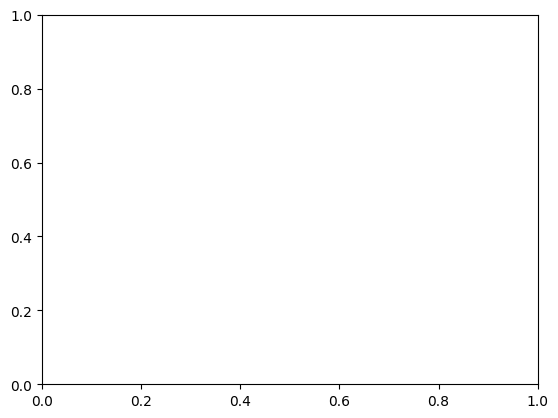

In [136]:
routeData = 0
fig,ax = plt.subplots()

def tspDrawInit():
    global dist, name, pos, routeData
    ax.set_frame_on(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect('equal')
    routeData, = ax.plot([],[],'-k')
    ax.plot(pos[:,0],pos[:,1],'ko', markersize=4)
    for xy, city in zip(pos, name):
        ax.annotate(city,xy=xy,xytext=(5,2),textcoords='offset points',ha='left', va='center', fontsize=12)

<div class="alert alert-block alert-info">
    
### Task 11: Animation <font color=red>(2 points)</font>

Implement the function `tspDrawFrame()` and generate an animation for the simulated annealing algorithm with the example of 10 cities in Germany. 
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 11</b>

Implementation of the function `tspDrawFrame()`:
</div>

In [141]:
def tspDrawFrame(routeID):
    global dist, pos, routes, routeData
    route = routes[routeID]

    xy = pos[route]
    xy_closed = np.vstack([xy, xy[0]])

    # Linie aktualisieren
    routeData.set_data(xy_closed[:, 0], xy_closed[:, 1])

    # (optional) Titel mit Schritt & Länge
    route_len = tspLength(dist, route)
    routeData.axes.set_title(f"Simulated Annealing – Step {routeID} | Länge: {route_len} km", fontsize=12)

    return (routeData,)

<div class="alert alert-block alert-success">
    
<b>Solution of task 11</b>

Animation for simulated annealing:
</div>

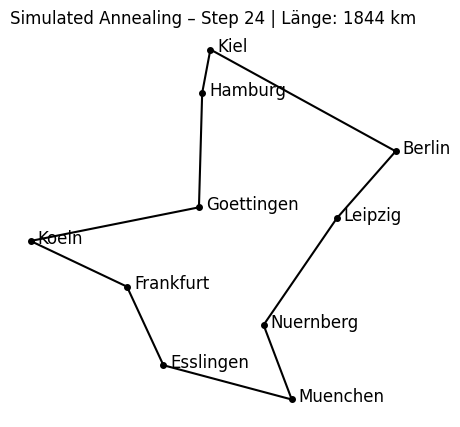

In [142]:


dist, name, pos = tspExample(10)
random.seed(42)  # beliebiger Seed
best_route, routes = tspSimulatedAnnealing(dist, beta=0.99, T_high=100, T_low=10)

# Plot/Canvas aufsetzen
fig, ax = plt.subplots(figsize=(7, 5))
tspDrawInit()  # benutzt global ax/routeData

# Animation bauen
anim = FuncAnimation(fig, tspDrawFrame, frames=len(routes), interval=150, blit=True)

# Inline anzeigen (zuverlässig, ohne ffmpeg)
HTML(anim.to_jshtml())


## 5 Evaluation
The only method where we can be sure that we have found the optimal solution of the TSP, is the brute force algorithm.
With the brute force algorithm, however, we cannot solve problems with much more than 10 cities, given the current performance of the computers.
Nearly optimal solutions can be determined with the 2-Opt-algorithm or with Simulated Annealing.

## 6 Embedding
Geographical locations are based on the fact that the earth can be approximated well by a sphere.
In mathematics, we therefore speak of spherical coordinates.
The shortest connection between two points on the surface of a sphere is called an orthodrome.
An orthodrome always runs on a great-circle, i.e. on a circle through the centre of the earth.
The length of an orthodrome is called great-circle distance or orthodromic distance.
The distances between two cities can be determined by the length of the orthodrome on a sphere with radius
$6.370$ km.

<div class="alert alert-block alert-info">
    
### Task 12: Distance on sphere <font color=red>(2 points)</font>

Implement the function `tspDistOnSphere()`.
Test it with the example of 10 cities in Germany and compare your results with all entries in the distance matrix in the first example.
</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 12</b>

Implementation of function `tspDistOnSphere()`:
</div>

In [143]:
def tspDistOnSphere(lng1,lat1,lng2,lat2):
    d = 0
    R = 6370.0
    # Grad -> Radiant
    lam1, phi1 = np.radians(lng1), np.radians(lat1)
    lam2, phi2 = np.radians(lng2), np.radians(lat2)

    dlam = lam2 - lam1
    dphi = phi2 - phi1

    # Haversine
    a = np.sin(dphi/2.0)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlam/2.0)**2
    c = 2.0 * np.arctan2(np.sqrt(a), np.sqrt(1.0 - a))
    d = R * c
    return float(d)

<div class="alert alert-block alert-success">
<b>Solution of task 12</b>
    
Testing with the example of 10 cities in Germany:
    
</div>

In [145]:
dist_ref, name, pos = tspExample(10)
n = len(pos)

# Distanzmatrix berechnen (Großkreis)
dist_sphere = np.array([
    [tspDistOnSphere(pos[i,0], pos[i,1], pos[j,0], pos[j,1]) if i != j else 0
     for j in range(n)]
    for i in range(n)
])

# auf ganze Kilometer runden
dist_sphere_round = np.rint(dist_sphere).astype(int)

# Abweichungen analysieren
diff = dist_sphere_round - dist_ref
print(f"Max. Abweichung (km): {abs(diff).max():d}")
print(f"Anzahl Einträge mit Abweichung ≠ 0: {np.count_nonzero(diff):d}")

# Beispielpaare anzeigen
for (i, j) in [(0,1), (0,4), (4,5), (1,9), (8,9)]:
    print(f"{name[i]:<10}–{name[j]:<10}: "
          f"Sphere={dist_sphere_round[i,j]:4d} | "
          f"Matrix={dist_ref[i,j]:4d} | "
          f"Δ={dist_sphere_round[i,j]-dist_ref[i,j]:+3d}")

Max. Abweichung (km): 0
Anzahl Einträge mit Abweichung ≠ 0: 0
Berlin    –Esslingen : Sphere= 510 | Matrix= 510 | Δ= +0
Berlin    –Hamburg   : Sphere= 256 | Matrix= 256 | Δ= +0
Hamburg   –Kiel      : Sphere=  86 | Matrix=  86 | Δ= +0
Esslingen –Nuernberg : Sphere= 151 | Matrix= 151 | Δ= +0
Muenchen  –Nuernberg : Sphere= 151 | Matrix= 151 | Δ= +0


## Literature
 - [https://en.wikipedia.org/wiki/Travelling_salesman_problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)
 - [https://en.wikipedia.org/wiki/FLOPS](https://en.wikipedia.org/wiki/FLOPS)
 - [https://en.wikipedia.org/wiki/TOP500](https://en.wikipedia.org/wiki/TOP500)
 - [https://en.wikipedia.org/wiki/2-opt](https://en.wikipedia.org/wiki/2-opt)
 - [https://en.wikipedia.org/wiki/Simulated_annealing](https://en.wikipedia.org/wiki/Simulated_annealing)
 - [https://en.wikipedia.org/wiki/Great-circle_distance](https://en.wikipedia.org/wiki/Great-circle_distance)
 - [https://developers.google.com/optimization/routing/tsp](https://developers.google.com/optimization/routing/tsp)